In [1]:
%matplotlib inline

import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _get_rundir(casename):
    return os.path.join(os.sep, 'glade', 'scratch', 'mlevy', casename, 'run')

def _get_archivedir(casename):
    return os.path.join(os.sep, 'glade', 'scratch', 'mlevy', 'archive', casename, 'ocn', 'hist')

def get_files(casenames, start_month=1, nmonths=5):
    if type(casenames) == str:
        casenames = [casenames]
    if type(casenames) != list:
        raise ValueError(f'{casenames} is not a string or list')

    files = []
    found = []
    for month in range(start_month, start_month+nmonths):
        found.append(False)
        date=f'0001-0{month}-01'
        for rootdir in [_get_archivedir, _get_rundir]:
            for casename in casenames:
                file = os.path.join(rootdir(casename), f'{casename}.pop.h.nday1.{date}.nc')
                found[-1] = os.path.exists(file)
                if found[-1]:
                    print(file)
                    files.append(file)
                    break
            if found[-1]:
                break
        if not found[-1]:
            print(f'No match for {date}')

    return files

def get_HMXL_timeseries_from_files(files):
    print('Opening xarray datasets...')
    ds = xr.open_mfdataset(files, combine='nested', concat_dim='time', decode_times=False)
    print(f'Datasets contain a total of {ds.sizes["time"]} days')
    return ds['HMXL_2'].isel(nlon=897, nlat=142).compute()

In [3]:
# Case 001: should have January through March in the archive with old name, April in the rundir with new name
%time da_001 = get_HMXL_timeseries_from_files(get_files(['g.e22.G1850ECO_JRA_HR.TL319_t13.001', 'g.e22.G1850ECO_JRA_HR.TL319_g17.001']))
print('\n')

# Case 002: should have January through April in the archive, May is still in the rundir
%time da_002 = get_HMXL_timeseries_from_files(get_files('g.e22.G1850ECO_JRA_HR.TL319_t13.002'))
print('\n')

# Case 003: should have January and February in the archive, March is in the rundir
%time da_003 = get_HMXL_timeseries_from_files(get_files('g.e22.G1850ECO_JRA_HR.TL319_t13.003'))
print('\n')

# Case 004: should have January and February are in the archive
%time da_004 = get_HMXL_timeseries_from_files(get_files('g.e22.G1850ECO_JRA_HR.TL319_t13.004'))

/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-02-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_g17.001/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_g17.001.pop.h.nday1.0001-03-01.nc
/glade/scratch/mlevy/g.e22.G1850ECO_JRA_HR.TL319_t13.001/run/g.e22.G1850ECO_JRA_HR.TL319_t13.001.pop.h.nday1.0001-04-01.nc
No match for 0001-05-01
Opening xarray datasets...
Datasets contain a total of 114 days
CPU times: user 3.15 s, sys: 4.05 s, total: 7.2 s
Wall time: 8.49 s


/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-01-01.nc
/glade/scratch/mlevy/archive/g.e22.G1850ECO_JRA_HR.TL319_t13.002/ocn/hist/g.e22.G1850ECO_JRA_HR.TL319_t13.002.pop.h.nday1.0001-02-01.nc
/glade/scratch/mlevy/archive/g.e22.G185

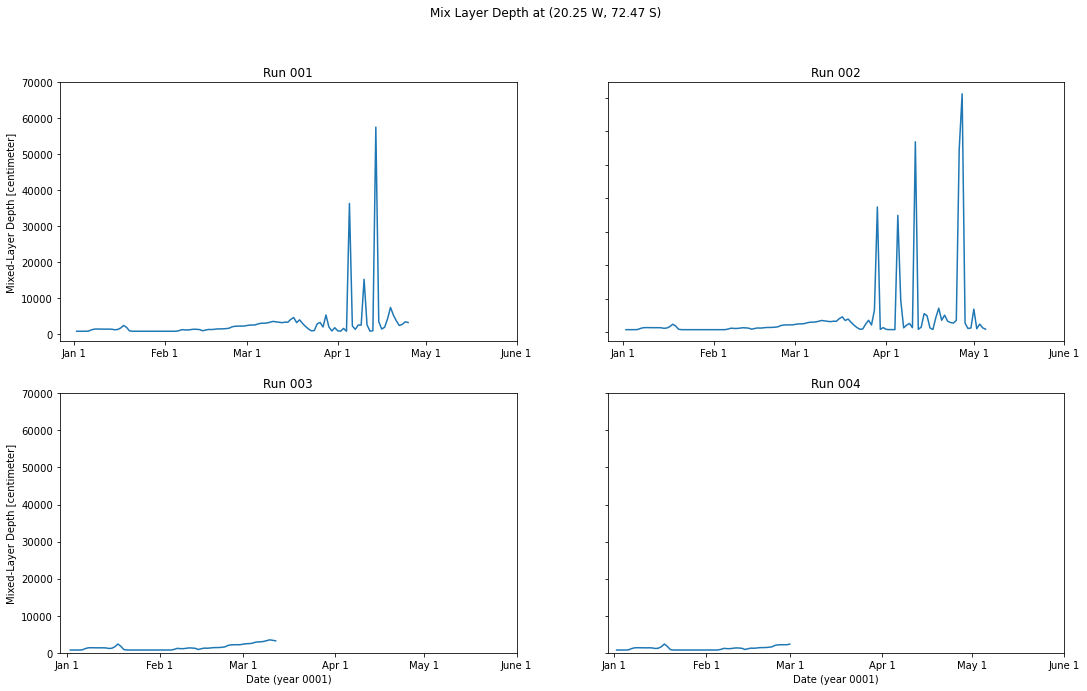

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18.0, 10.5))
xticks = 365 + np.array([0, 31, 59, 90, 120, 151])
xlabels = ['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'May 1', 'June 1']
yticks=np.linspace(0, 7e4, 8)

long_west = 360 - da_001['TLONG'].data
lat_south = -da_001['TLAT'].data
fig.suptitle(f'Mix Layer Depth at ({long_west:.2f} W, {lat_south:.2f} S)')

plt.subplot(221)
da_001.plot()
plt.title('Run 001')
plt.xticks(xticks, xlabels)
plt.xlabel('')
plt.yticks(yticks)

plt.subplot(222)
da_002.plot()
plt.title('Run 002')
plt.xticks(xticks, xlabels)
plt.xlabel('')
plt.yticks(yticks, '')
plt.ylabel('')

plt.subplot(223)
da_003.plot()
plt.title('Run 003')
plt.xticks(xticks, xlabels)
plt.xlabel('Date (year 0001)')
plt.yticks(yticks)

plt.subplot(224)
da_004.plot()
plt.title('Run 004')
plt.xticks(xticks, xlabels)
plt.xlabel('Date (year 0001)')
plt.yticks(yticks, '')
plt.ylabel('')

plt.show()

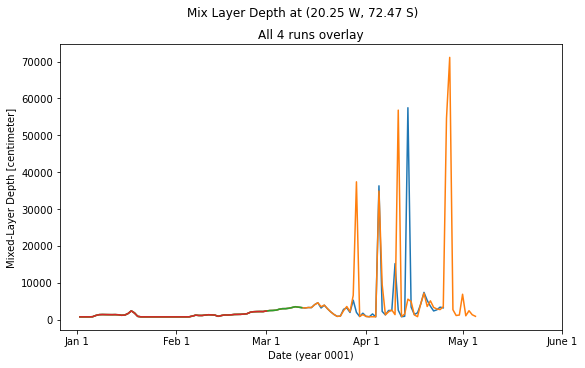

In [5]:
fig = plt.figure(figsize=(9.0, 5.25))
fig.suptitle(f'Mix Layer Depth at ({long_west:.2f} W, {lat_south:.2f} S)')

for da in [da_001, da_002, da_003, da_004]:
    da.plot()
plt.title('All 4 runs overlay')
plt.xticks(xticks, xlabels)
plt.yticks(yticks)
plt.xlabel('Date (year 0001)')
plt.show()